In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
ecom=pd.read_csv('Ecommerce Customers.csv')

In [5]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

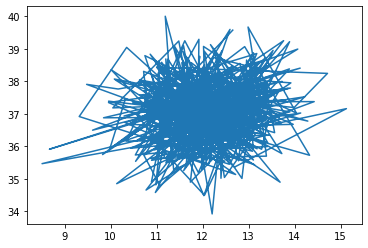

In [7]:
plt.plot(ecom['Time on App'],ecom['Time on Website'])

In [8]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
X=ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=ecom['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [15]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [16]:
from sklearn.svm import SVR

In [18]:
model=SVR()

In [19]:
model.fit(X_train,y_train)

C:\Users\cryptoash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
pr=model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,pr)

0.32561118792264

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
md=DecisionTreeRegressor()

In [27]:
md.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [28]:
pr=md.predict(X_test)

In [29]:
r2_score(y_test,pr)

0.8770414964236345

In [30]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [32]:
gr=GaussianProcessRegressor()

In [33]:
gr.fit(X_train,y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [34]:
pr=gr.predict(X_test)

In [35]:
r2_score(y_test,pr)

-1.5671685246621676

In [36]:
from sklearn.ensemble import BaggingRegressor

In [37]:
br=BaggingRegressor()

In [38]:
br.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [40]:
pr=br.predict(X_test)

In [41]:
r2_score(y_test,pr)

0.9247219016825191

ValueError: x and y must be the same size

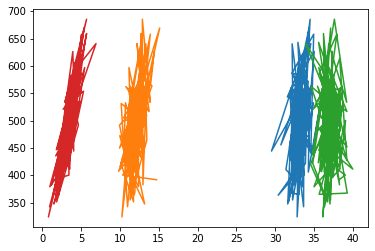

In [50]:
plt.plot(X_test,pr)
plt.scatter(X_test,y_test)


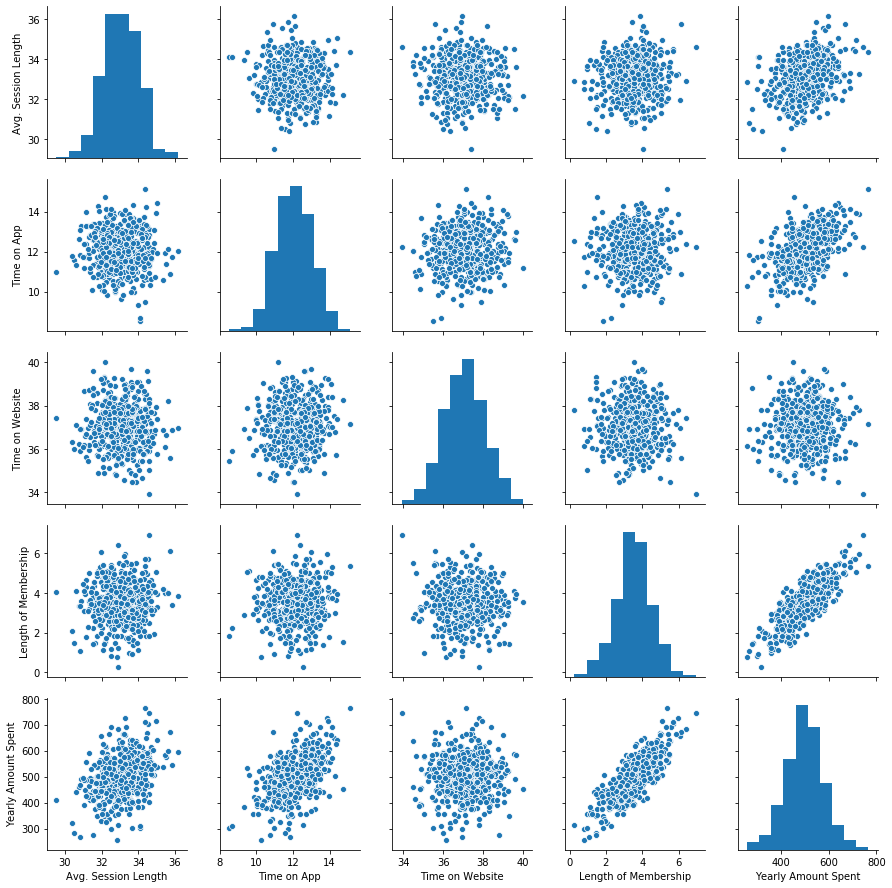

In [52]:
sb.pairplot(ecom)